# Deep Learning: Ex.4 - Training Networks

Submitted by: [... **name & ID** ...]


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.layers import Input, Dropout, BatchNormalization  # <-- new layers!
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation # <-- new layers!

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from seaborn import heatmap 

print(tf.__version__)

2.7.0


### Load the CIFAR-10 Dataset

We will use the same CIFAR-10 dataset as in Ex.3:

In [2]:
# 1. load/download the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
train_labels = train_labels.flatten()  # (50000, 1) -> (50000,)
test_labels = test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 4. define the 10 classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('train_images.shape =',train_images.shape)
print('train_labels.shape =',train_labels.shape)
print('test_images.shape =',test_images.shape)
print('test_labels.shape =',test_labels.shape)


train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000,)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000,)


***

## 1. Testing SGD options

Our basic model will be the same as in Ex.3:

- `Input` layer
- 32 3x3-`Conv2D` + 2x2 `MaxPooling` 
- 64 3x3-`Conv2D` + 2x2 `MaxPooling` 
- 128 3x3-`Conv2D` + 2x2 `MaxPooling` 
- 128-`Dense` 
- 10-`Dense` - output layer 


Prepeare a function that returns this model (without the `compile` part, just the layers)



In [3]:
def make_basic_model():
    # build out basic model
    the_model = Sequential()
    the_model.add(Input(shape=(32,32,3)))
    the_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D((2,2)))
    the_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D((2,2)))
    the_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D((2,2)))
    the_model.add(Flatten())
    the_model.add(Dense(128, activation='relu'))
    the_model.add(Dense(10, activation='softmax'))
    return the_model

In [4]:
def figure_result(loss,val_loss,accuracy, val_accuracy):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(loss,'r', label='train')
  plt.plot(val_loss,':r', label='test')
  plt.title('Loss',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
  plt.legend()
  plt.grid()

  plt.subplot(1,2,2)
  plt.plot(accuracy,'b', label='train')
  plt.plot(val_accuracy,':b', label='test')
  plt.ylim([0, 1])
  plt.title('Accuracy',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
  plt.legend()
  plt.grid()
  print('accuracy train:', accuracy[-1])
  print('accuracy test:', val_accuracy[-1])

In [5]:
def print_confusion_matrix(true_lables,predicteded_lables ):
  predicted = tf.argmax(predicteded_lables, axis=1)
  cm= confusion_matrix(true_lables, predicted)
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(10,10))
  heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

In [6]:
results = []
colors = ['b','g','r','y']

In [15]:
def add_result(name, result_input):
  history = {
    'loss':result_input.history['loss'],
    'val_loss':result_input.history['val_loss'],
    'accuracy':result_input.history['accuracy'],
    'val_accuracy':result_input.history['val_accuracy']
  }
  result = {'model_name':name ,'history': history, 'accuracy':result_input.history['val_accuracy'][-1]}
  results.append(result)


We will train the same model, each time using a different optimizer:
- SGD with `learning_rate = 0.01`  (the default value)
- SGD with `learning_rate = 0.001` 
- SGD with `learning_rate = 0.1`
- SGD with `learning_rate = 0.01` and `momentum = 0.9`


In order to train each model from scratch (and not to continue training the same model again and again), create a new model each time (m1, m2, m3, m4).

Also, use a **different variable** to record the `history` of the training results (h1, h2, h3, h4).

Train each model for 100 epochs with a batch size of 64 (remember to use a GPU), and plot the usual graphs (loss&accuracy for train&test).



####  SGD with learning_rate = 0.01


In [8]:
model = make_basic_model()

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

history = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0, validation_data=(test_images,test_labels ))


accuracy train: 1.0
accuracy test: 0.7081000208854675


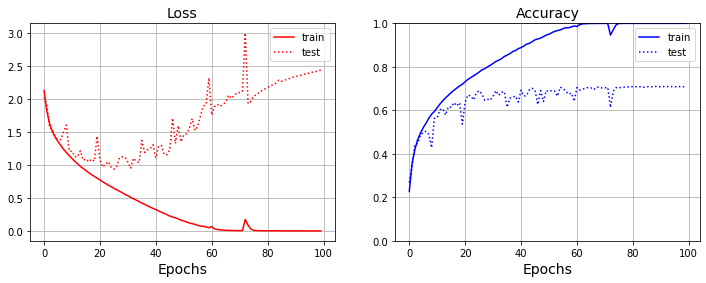

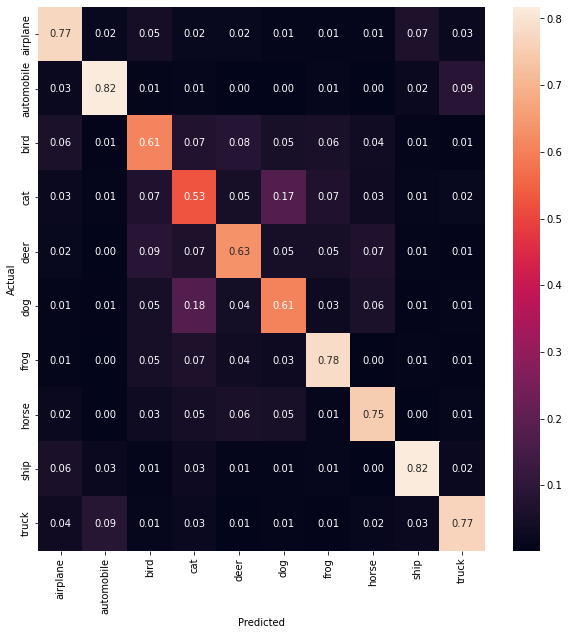

In [16]:
add_result('learning_rate=0.01',history)
y_pred  = model.predict(test_images)
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])
print_confusion_matrix(test_labels,y_pred)

#### SGD with learning_rate = 0.001 



accuracy train: 0.6682999730110168
accuracy test: 0.6238999962806702


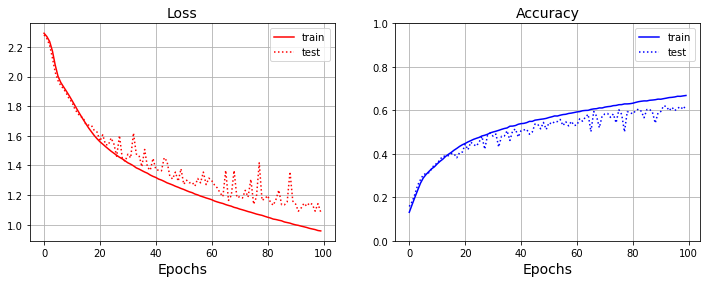

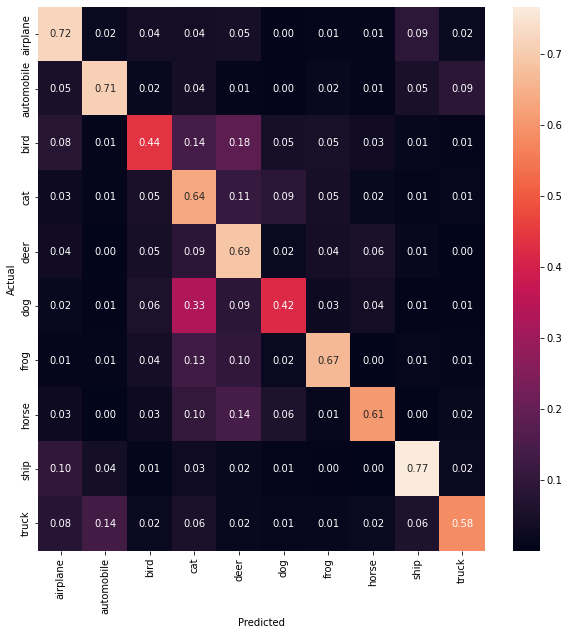

In [18]:
model = make_basic_model()

opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

history = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0, validation_data=(test_images,test_labels ))
add_result('learning_rate=0.001',history)

y_pred  = model.predict(test_images)
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])
print_confusion_matrix(test_labels,y_pred)



#### SGD with learning_rate = 0.1 


accuracy train: 0.9670199751853943
accuracy test: 0.6962000131607056


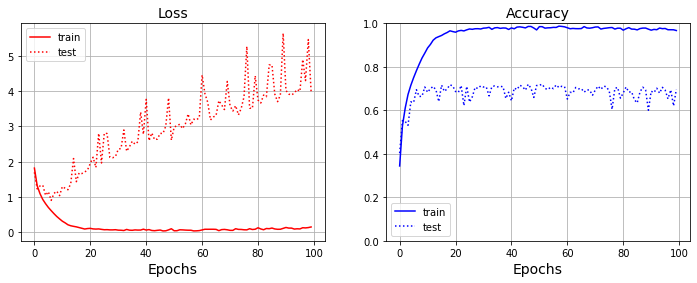

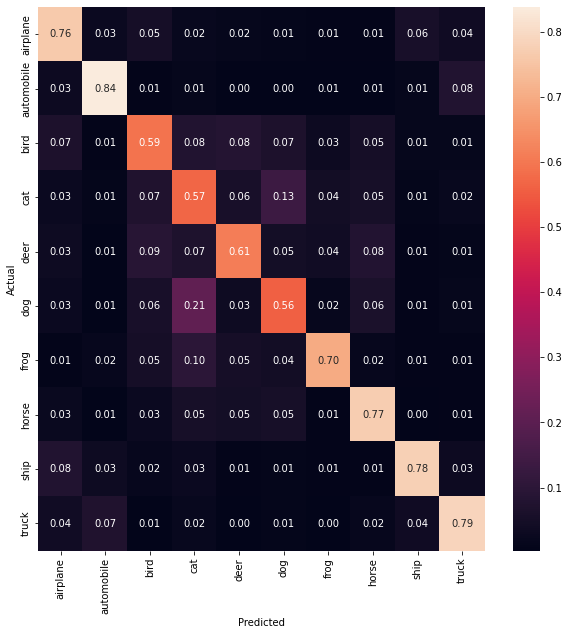

In [21]:
model = make_basic_model()

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0, validation_data=(test_images,test_labels ))
add_result('learning_rate=0.1',history)

y_pred  = model.predict(test_images)
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])
print_confusion_matrix(test_labels,y_pred)

#### SGD with learning_rate = 0.01 and momentum = 0.9


accuracy train: 0.9597200155258179
accuracy test: 0.6880999803543091


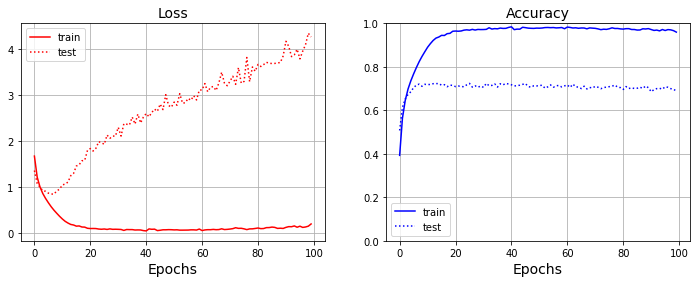

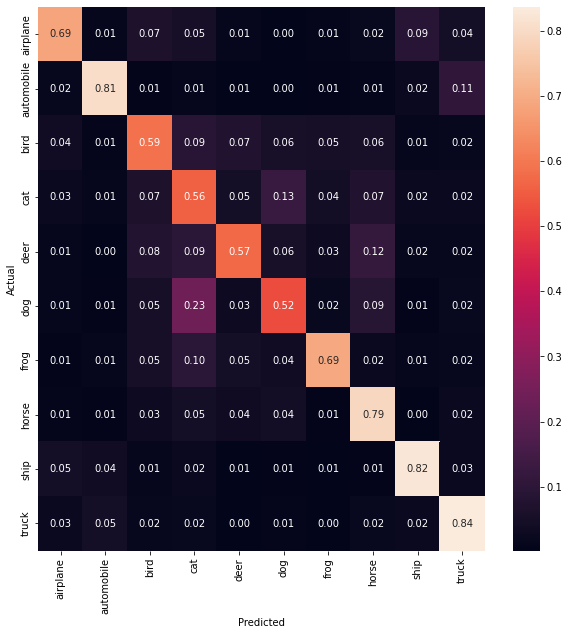

In [22]:
model = make_basic_model()
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

history = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0, validation_data=(test_images,test_labels ))
add_result('learning_rate=0.01, momentum = 0.9',history)

y_pred  = model.predict(test_images)
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])
print_confusion_matrix(test_labels,y_pred)

#### Graphical comparison 

Finally, In a single graph, plot together the training loss curves of all 4 runs (use different color for each plot, and add a proper legend).


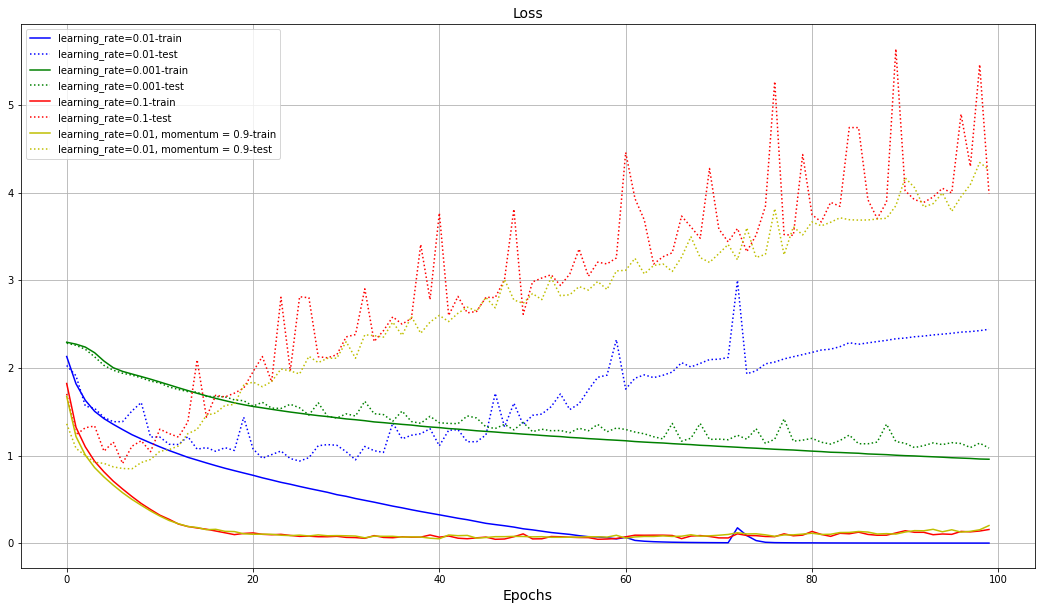

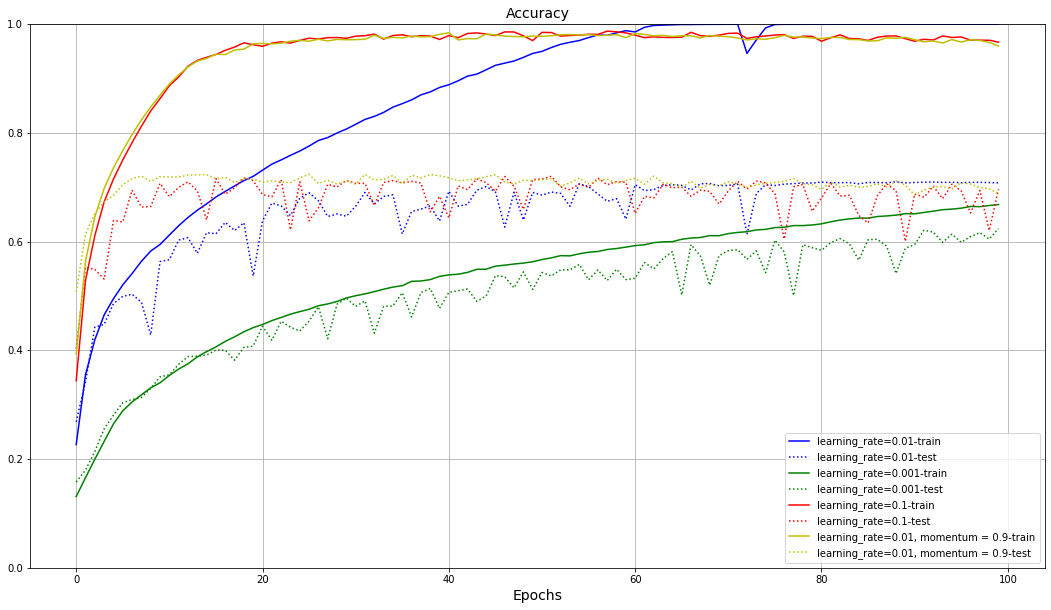

In [57]:
loop = range(len(results))
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)

for i in loop:
  item = results[i]
  name = item['model_name']
  plt.plot(item['history']['loss'],colors[i], label=f'{name}-train')
  plt.plot(item['history']['val_loss'], f':{colors[i]}', label=f'{name}-test')
  plt.title('Loss',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()

plt.figure(figsize=(40,10))
plt.subplot(1,2,2)
for i in loop:
  item = results[i]
  name = item['model_name']
  plt.plot(item['history']['accuracy'],colors[i], label=f'{name}-train')
  plt.plot(item['history']['val_accuracy'],f':{colors[i]}', label=f'{name}-test')
  plt.ylim([0, 1])
  plt.title('Accuracy',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()





---
## 2. Add Dropout

In order to overcome the over-training we will add `dropout` layers: one `dropout` layer before each of the `Dense` layers. Use a 20% dropout rate.

Pick your favorite SGD optimizer and train the network for 50 Epochs. 

- Verify that you get better results in terms of over-training (less over-training is better..)

- Did you also get a better accuracy on the validation data?

accuracy train: 0.4952000081539154
accuracy test: 0.5250999927520752


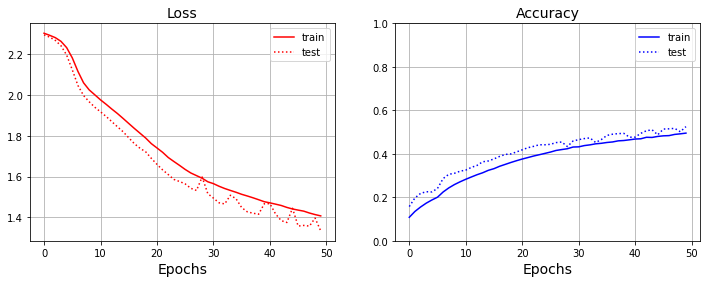

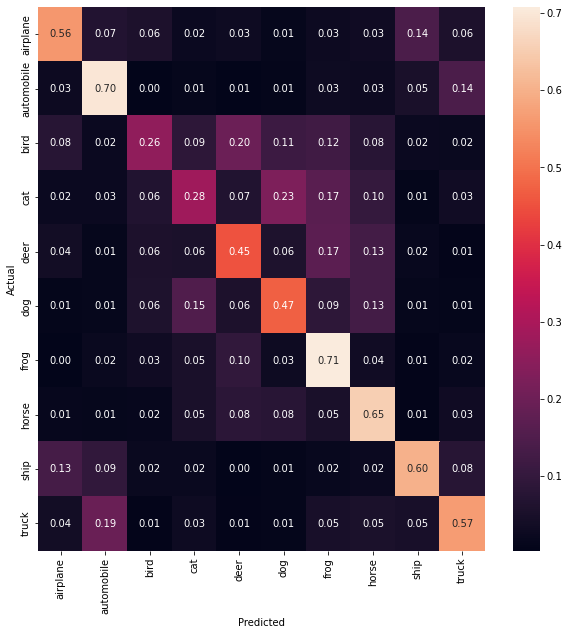

In [58]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0, validation_data=(test_images,test_labels ))
add_result('learning_rate=0.001 + dropout',history)

y_pred  = model.predict(test_images)
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])
print_confusion_matrix(test_labels,y_pred)

---
## 3. Add Data Augmentation

Add 2-3 layers of data augmentation (of your choice) to the previous model (with the dropout).

- Train the model (50 epoch)

- Did you get better results?


In [ ]:
        ################################
        ###  your code goes here...  ###
        ################################

---
## 4. Deeper model

Finally, lets make the model a bit deeper, doubling each `Conv2D` layer.
We will also add `BatchNormalization` layers in between, to help the learning converge faster

- 32 3x3-`Conv2D` + BatchNormalization()` + 32 3x3-`Conv2D` + BatchNormalization()` + 2x2 `MaxPooling` 
- 64 3x3-`Conv2D` + BatchNormalization()` + 64 3x3-`Conv2D` + BatchNormalization()` + 2x2 `MaxPooling` 
- 128 3x3-`Conv2D` + BatchNormalization()` + 128 3x3-`Conv2D` + BatchNormalization()` + 2x2 `MaxPooling` 

Train this model (including the data augmentation and drop-out) and plot the usual graphs.

(Hopefully, you should get close to 90% accuracy..)

In [ ]:
        ################################
        ###  your code goes here...  ###
        ################################

***
## Good Luck!